In [75]:
import pandas as pd

In [76]:
data = pd.read_excel('data.xlsx')
data_active = pd.read_excel("data_active.xlsx")
data_cause_leaving = pd.read_excel("data_cause_leaving.xlsx")
data_v = pd.read_excel('data_voluntarily_leaving.xlsx')

My thinking is that the main source of brain drain is voluntary turnover.  Because basically those who are fired by the company are definitely not talents, so I focus the data analysis on employees who voluntarily leave the company.

# Find the variables influence the reasons best

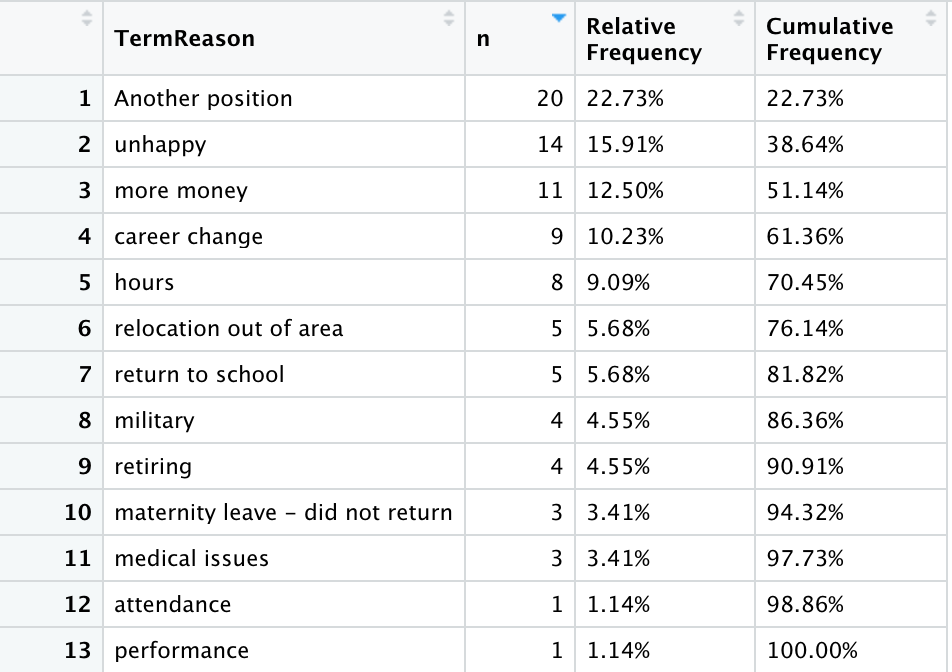

**We could find that from reason6 to reason13, Employees leave due to irresistible factors, so we cannot control the choices of these employees, that is to say, their departure has basically nothing to do with company management.**

In [77]:
col_to_drop = ["Termd" , "Position" ,"State" ,"Zip" , "DOB" , "MaritalDesc" ,"CitizenDesc" , "HispanicLatino", "RaceDesc", "DateofHire", "DateofTermination" , "EmploymentStatus" , "Department", "ManagerName",
               "RecruitmentSource", "DateDiff" ,"Sex" ,"Employee.Name"]

In [78]:
data_v.drop(col_to_drop, axis=1, inplace=True)

In [79]:
data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PerfScore             88 non-null     int64  
 1   FromDiversityJobFair  88 non-null     int64  
 2   Salary                88 non-null     int64  
 3   PositionID            88 non-null     int64  
 4   TermReason            88 non-null     object 
 5   ManagerID             88 non-null     int64  
 6   EngagementSurvey      88 non-null     float64
 7   EmpSatisfaction       88 non-null     int64  
 8   SpecialProjectsCount  88 non-null     int64  
 9   ManPos                88 non-null     int64  
 10  TechLev               88 non-null     int64  
 11  JobStr                88 non-null     int64  
 12  AssColl               88 non-null     int64  
 13  AssSelf               88 non-null     int64  
 14  AssLead               88 non-null     int64  
 15  TeamIden              88 

## Logistics Regression

In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
data_v = data_v[data_v["TermReason"].str.contains("unhappy|Another|more money|career|hours")]

In [82]:
data_v["TermReason"].value_counts()

Another position    20
unhappy             14
more money          11
career change        9
hours                8
Name: TermReason, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_v.drop(['TermReason'], axis=1), data_v['TermReason'], test_size=0.2)


lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)


for i, label in enumerate(lr.classes_):
    print('Coefficients for {}:'.format(label))
    for j, coef in enumerate(lr.coef_[i]):
        print('{}: {}'.format(X_train.columns[j], coef))
    print('\n')

Coefficients for Another position:
PerfScore: 0.017267392816198438
FromDiversityJobFair: 0.00864265205338944
Salary: 2.390903768748966e-05
PositionID: 0.026021841470988297
ManagerID: 0.03402190635532249
EngagementSurvey: 0.011767586320279808
EmpSatisfaction: 0.009935315045720202
SpecialProjectsCount: -0.0006742370810919358
ManPos: -0.0013163759893548132
TechLev: -0.01462801035400246
JobStr: -0.020153394382468093
AssColl: 0.03558775257386704
AssSelf: 0.002306154361841215
AssLead: 0.018544953569836004
TeamIden: -0.001422045509032099
OrgIden: -0.014627058622711705
ConHour: -0.0578623258073412
CarOpp: -0.01907924840467195
PsySafe: 0.005426159182453656
Voice: 0.015365578862527977
Trust: 0.008221909798485036
OCB: 0.01328180885138475


Coefficients for career change:
PerfScore: -0.021286337523701154
FromDiversityJobFair: 0.010140032677286595
Salary: 5.681883130629997e-06
PositionID: -0.0301688984064881
ManagerID: -0.03447781828372111
EngagementSurvey: -0.008566220528595165
EmpSatisfaction: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from tabulate import tabulate

#Top 6 variables which affect the TermReason

table = []


for i, label in enumerate(lr.classes_):
    coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_[i]})
    coef_df = coef_df.sort_values('Coefficient', ascending=False)
    top_vars = coef_df.head(6)['Feature'].tolist()

    table.append([label, '', '', '', '', ''])
    for j, var in enumerate(top_vars):
        table.append(['', j+1, var, coef_df[coef_df['Feature']==var]['Coefficient'].values[0], '', ''])


print(tabulate(table, headers=['Reason', 'Rank', 'Variable', 'Coefficient', '', '']))

Reason            Rank    Variable              Coefficient
----------------  ------  --------------------  ---------------------  --  --
Another position
                  1       AssColl               0.03558775257386704
                  2       ManagerID             0.03402190635532249
                  3       PositionID            0.026021841470988297
                  4       AssLead               0.018544953569836004
                  5       PerfScore             0.017267392816198438
                  6       Voice                 0.015365578862527977
career change
                  1       TeamIden              0.03352574064663214
                  2       TechLev               0.02495051826068056
                  3       CarOpp                0.013711370207488825
                  4       Voice                 0.01142988747175778
                  5       FromDiversityJobFair  0.010140032677286595
                  6       SpecialProjectsCount  0.009376241686913077
hours
  

## Random Forest

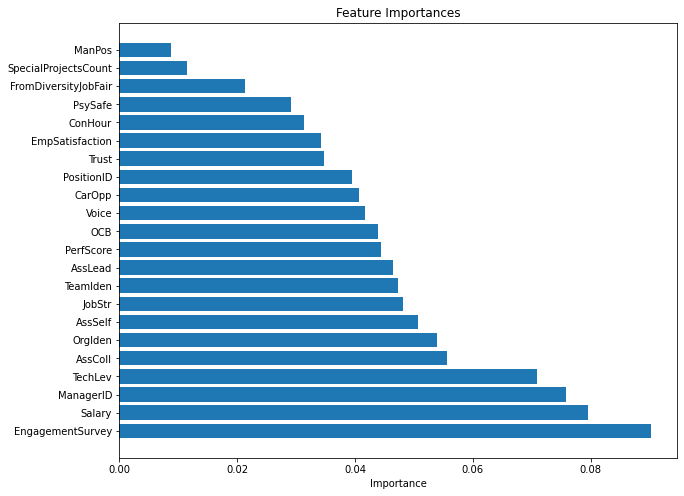

Top 6 features: ['EngagementSurvey', 'Salary', 'ManagerID', 'TechLev', 'AssColl', 'OrgIden']
Top features for Another position:
['EngagementSurvey', 'Salary', 'AssColl', 'AssSelf', 'JobStr', 'CarOpp']


Top features for career change:
['ManagerID']


Top features for hours:
['OrgIden', 'AssLead']


Top features for more money:
['TechLev', 'TeamIden', 'PerfScore', 'Voice', 'PositionID', 'ConHour']


Top features for unhappy:
['OCB', 'PsySafe', 'SpecialProjectsCount', 'ManPos']




<ipython-input-86-89fa04e9d3d3>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coef_df = feature_importances[y_train.reset_index(drop=True) == reason].reset_index(drop=True)


In [86]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(X_train, y_train)

# select feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# figure
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

# Top 6 feature
top_features = feature_importances['Feature'][:6].tolist()
print('Top 6 features:', top_features)

# Top 6 feature associated with reasons
top_vars = {}
for i, reason in enumerate(lr.classes_):
    print('Top features for {}:'.format(reason))
    coef_df = feature_importances[y_train.reset_index(drop=True) == reason].reset_index(drop=True)
    coef_df = coef_df.sort_values('Importance', ascending=False)
    top_vars[reason] = coef_df.head(6)['Feature'].tolist()
    print(top_vars[reason])
    print('\n')

## PCA analysis

In [101]:
from sklearn.decomposition import PCA


pca = PCA(n_components=5)


X_pca = pca.fit_transform(X_train)


var_ratios = pca.explained_variance_ratio_


top_features = [X_train.columns[i] for i in np.argsort(np.abs(weights[0]))[::-1][:8]]
print('Top 8 features:', top_features)


Top 8 features: ['Salary', 'ManagerID', 'SpecialProjectsCount', 'ConHour', 'ManPos', 'Voice', 'PositionID', 'EmpSatisfaction']


# Some basic analysis

## Race distribution

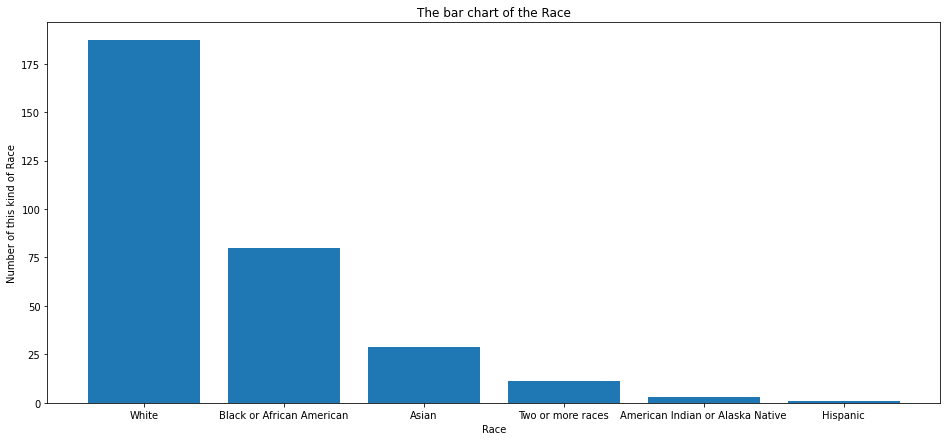

In [91]:
A =["White","Black or African American", "Asian", "Two or more races" ,"American Indian or Alaska Native", "Hispanic"]

B =[187, 80, 29, 11, 3, 1]


fig = plt.figure(figsize =(16, 7))
plt.bar(A, B)
plt.title('The bar chart of the Race')
plt.xlabel('Race')
plt.ylabel('Number of this kind of Race')
plt.show()

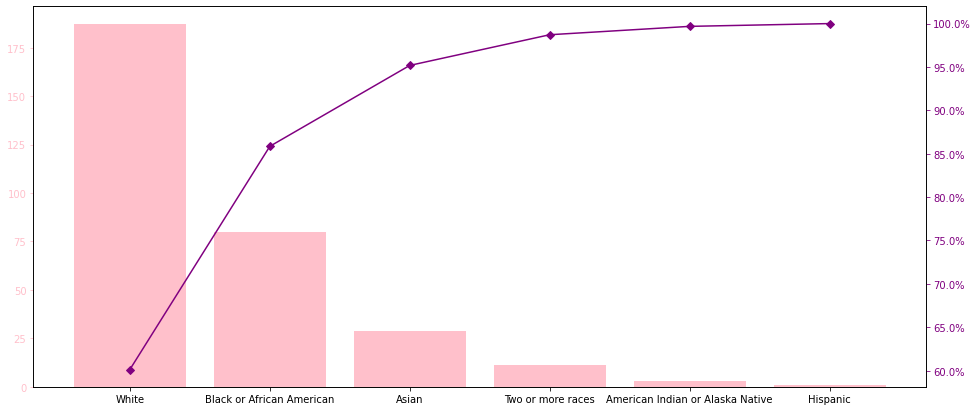

In [92]:
from matplotlib.ticker import PercentFormatter
df = pd.DataFrame({"count" : B , "race" : A})


df['cumperc'] = df['count'].cumsum()/df['count'].sum()*100
df['percentage'] = df['count'].values/df['count'].sum()

color1 = 'pink'
color2 = 'purple'
line_size = 6

fig, ax = plt.subplots(figsize =(16, 7))
ax.bar(A, B, color=color1)

ax2 = ax.twinx()
ax2.plot(A, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()

## The department with number of people leaving

In [93]:
Department_name = ["Production","IT/IS","Sales","Software Engineering","Admin Offices"]

termed_count = [83,10,5,4,2]

In [94]:
pd_count_termed = pd.DataFrame({"Department" : Department_name, 
                          "count" : termed_count})

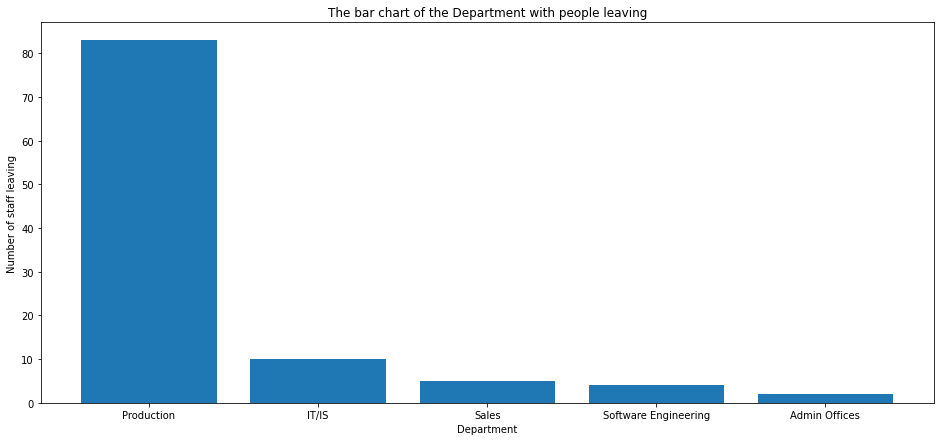

In [98]:
fig = plt.figure(figsize =(16, 7))
plt.bar(Department_name, termed_count)
plt.title('The bar chart of the Department with people leaving')
plt.xlabel('Department')
plt.ylabel('Number of staff leaving')
plt.show()

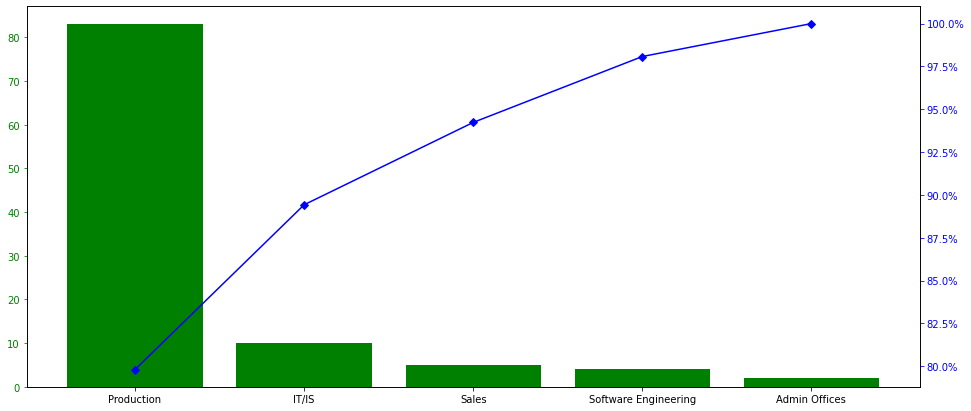

In [99]:
pd_count_termed['cumperc'] = pd_count_termed['count'].cumsum()/pd_count_termed['count'].sum()*100
pd_count_termed['percentage'] = pd_count_termed['count'].values/pd_count_termed['count'].sum()

color1 = 'green'
color2 = 'blue'
line_size = 6

fig, ax = plt.subplots(figsize =(16, 7))
ax.bar(Department_name, termed_count, color=color1)

ax2 = ax.twinx()
ax2.plot(Department_name, pd_count_termed['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [100]:
production_left = 83
other_left = 21

from scipy import stats

t_statistic, p_value = stats.ttest_ind(production_left, other_left, equal_var=False)

if p_value < 0.05:
  print("The number of employees leaving Production department is significantly higher than other departments.")
else:
  print("There is no significant difference in the number of employees leaving Production department compared to other departments.")

There is no significant difference in the number of employees leaving Production department compared to other departments.


<ipython-input-100-b9e6e4e10ae9>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(production_left, other_left, equal_var=False)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


## 

In [97]:
data_v_1 = pd.read_excel('data_voluntarily_leaving.xlsx')